In [1]:
# Import libraries. 
# Generate images in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import collections
from collections import defaultdict
import gzip
import itertools
import numpy as np
import os
import time
import pandas as pd
import seaborn as sns

import bokeh
import bokeh.io
from bokeh.io import push_notebook
from bokeh.plotting import figure, show, save, output_notebook, output_file

# Import colour palettes for later on
from bokeh.palettes import Category20b
from bokeh.palettes import Purples
from bokeh.palettes import Greens
from bokeh.palettes import YlOrBr
from bokeh.palettes import YlOrRd
from bokeh.palettes import PuOr
from bokeh.palettes import RdGy

# Dimension reduction tools
from sklearn.decomposition import PCA as PCA
from sklearn.manifold import TSNE
import umap 

In [6]:
#loading population data
population_key= pd.read_csv("sample_key_tsneguided.txt", sep='\t', header=None)
#population_key.set_index()

#changing the first row to headers
headers = population_key.iloc[0]
population_key_df  = pd.DataFrame(population_key.values[1:], columns=headers) 

print(population_key_df['CLUSTER'].unique())

cluster_names=population_key_df['CLUSTER'].unique()
cluster_names_sorted=population_key_df['CLUSTER'].value_counts().index.tolist()


['SWG' 'WM' 'EG' 'EM']
['SWG', 'EG', 'EM', 'WM']


In [7]:
#print(population_key_df.head(3))

#print(population_key_df.sort_values(by='CLUSTER',ascending=True))
print(population_key_df['CLUSTER'].value_counts().index.tolist())

#aa=population_key_df.sort_values(by='CLUSTER')







['SWG', 'EG', 'EM', 'WM']


In [8]:
print(population_key_df.loc[population_key_df['CLUSTER'] == cluster_names_sorted[1]])

0   FID    IID CLUSTER
11   23   CC01      EG
12   24   CC02      EG
13   25   CC03      EG
14   26   CC06      EG
15   27   CC14      EG
17   29   CC21      EG
19   31   CC25      EG
20   32   CC26      EG
21   33   CC27      EG
22   34   CC31      EG
23   35   CC32      EG
24   36   CC33      EG
25   37   CC36      EG
26   38   CC41      EG
43   70  GTE01      EG
45   72  GTE03      EG
47   74  GTE05      EG
67  131   TK05      EG
68  132   TK06      EG
70  134   TK11      EG
71  135   TK12      EG


In [36]:
#generate a dictionary that contains clusters to check and IDs in it
#df is the dataframe version and np is numpy array, will continue with np

#struct_np=dict() #initiate an empty dictionary
Order_df=pd.DataFrame()

for i in range(0,len(cluster_names)):
       Order_df= Order_df.append(population_key_df.loc[population_key_df['CLUSTER'] == cluster_names_sorted[i]])

        
print(Order_df)
Order_df['FID'] = Order_df['FID'].astype('int')

#Order_df.loc["FID"] -= 1

print(Order_df)



0   FID    IID CLUSTER
0     4   AM01     SWG
1     5   AM07     SWG
2     6   AM17     SWG
3     7   AM21     SWG
4    10   ANM1     SWG
..  ...    ...     ...
73  137  WMAL2      WM
74  138  WMAL3      WM
75  139  WMAL4      WM
76  140  WMAL5      WM
77  141  WMAL6      WM

[79 rows x 3 columns]


/var/folders/5c/dpc69bms35s7wc11y9mrgd7h001r18/T/ipykernel_68014/377124554.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Order_df= Order_df.append(population_key_df.loc[population_key_df['CLUSTER'] == cluster_names_sorted[i]])
/var/folders/5c/dpc69bms35s7wc11y9mrgd7h001r18/T/ipykernel_68014/377124554.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Order_df= Order_df.append(population_key_df.loc[population_key_df['CLUSTER'] == cluster_names_sorted[i]])
/var/folders/5c/dpc69bms35s7wc11y9mrgd7h001r18/T/ipykernel_68014/377124554.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Order_df= Order_df.append(population_key_df.loc[population_key_df['CLUSTER'] == cluster_names_sorted[i]])
/var/folders/5c/dpc69bms35s7wc11y9

In [23]:
#loading relatedness data and correcting the idx so that there wont be 0 and it will match the individual samples' id
#relatedness= pd.read_csv("deneme_rm1_20_m05.txt", sep='\t') # load relatedness data
relatedness_matrix= pd.read_excel(r'relatedness_mm1_20_ID_nopara_mmq30.xls') # load relatedness matrix data
relatedness_matrix_np=relatedness_matrix.to_numpy()

0.009893


In [42]:
i=0
j=1

print(relatedness_matrix_np[Order_df['FID'].iloc[i]-1,Order_df['FID'].iloc[j]-1]) #-1 stands for the correction of FID values to indices in python np relatedness matrix

0.029292


In [51]:
#generating a reduced relatedness matrix with 79 entries instead of 143
relatedness_matrix_reduced=np.zeros((Order_df.shape[0],Order_df.shape[0])) # generate an empty matrix with zeros


for i in range(0,Order_df.shape[0]):
    for j in range(0,Order_df.shape[0]):
        if i <= j:
            if i == j:
                relatedness_matrix_reduced[i,j]=np.nan
            else:
                relatedness_matrix_reduced[i,j]=relatedness_matrix_np[Order_df['FID'].iloc[i]-1,Order_df['FID'].iloc[j]-1] #-1 stands for the correction of FID values to indices in python np relatedness matrix
                relatedness_matrix_reduced[j,i]=relatedness_matrix_np[Order_df['FID'].iloc[i]-1,Order_df['FID'].iloc[j]-1] #-1 stands for the correction of FID values to indices in python np relatedness matrix



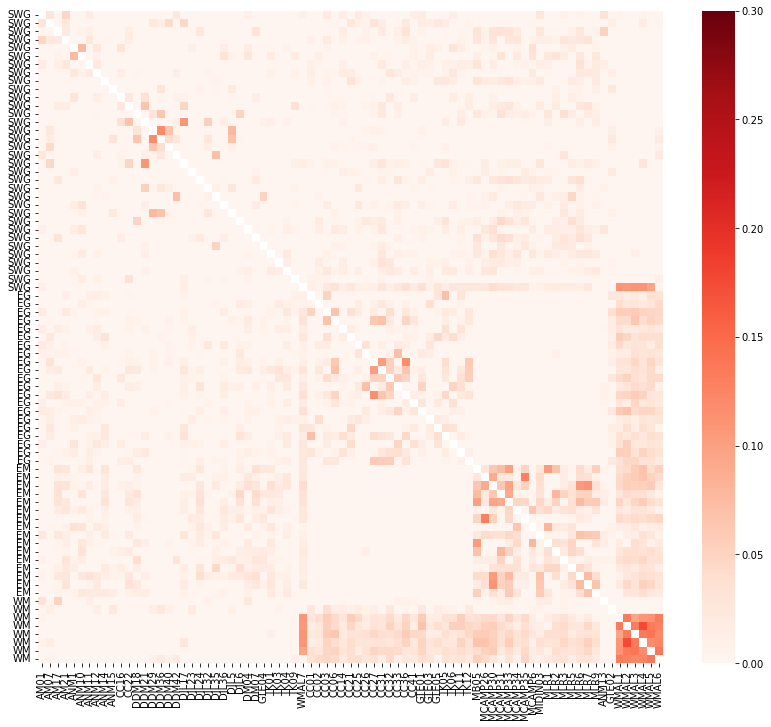

In [55]:
plt.figure(figsize=(14,12))
sns.heatmap(relatedness_matrix_reduced,xticklabels=Order_df['IID'],yticklabels=Order_df['CLUSTER'],cmap='Reds',vmin=0, vmax=0.3)
plt.savefig('Relatedness_Heatmap_sortedbynewclusters79.png',format='png',dpi=100,transparent = False,facecolor='white')

